# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]

# Create the Suburban and Rural city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]




In [4]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]

# Get the number of rides for suburban cities.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

# Get the number of rides for rural cities.
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]




In [5]:
#Urban ride count
urban_ride_count.head()



city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [6]:
# Suburban ride count
suburban_ride_count.head()



city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [7]:
# Rural ride count
rural_ride_count.head()



city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [8]:
# Get the total number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).sum()["driver_count"]

# Get the total number of drivers for each city for the suburban and rural cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).sum()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).sum()["driver_count"]




In [9]:
#Urban driver count
urban_driver_count.head()



city
Amandaburgh         216
Barajasview         572
Carriemouth        1404
Christopherfurt    1107
Deanville           931
Name: driver_count, dtype: int64

In [10]:
# Suburban driver count
suburban_driver_count.head()



city
Barronchester    176
Bethanyland      396
Brandonfort      190
Colemanland      506
Davidfurt        391
Name: driver_count, dtype: int64

In [11]:
# Rural driver count
rural_driver_count.head()



city
Bradshawfurt      70
Garzaport         21
Harringtonfort    24
Jessicaport        6
Lake Jamie        24
Name: driver_count, dtype: int64

In [12]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]


In [13]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).sum()["fare"]

# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).sum()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).sum()["fare"]




In [14]:
urban_avg_fare.head()


city
Amandaburgh        443.55
Barajasview        557.31
Carriemouth        764.49
Christopherfurt    661.55
Deanville          491.01
Name: fare, dtype: float64

In [15]:
suburban_avg_fare.head()


city
Barronchester    582.76
Bethanyland      593.21
Brandonfort      673.31
Colemanland      679.68
Davidfurt        543.93
Name: fare, dtype: float64

In [16]:
rural_avg_fare.head()


city
Bradshawfurt      400.64
Garzaport          72.37
Harringtonfort    200.82
Jessicaport       216.08
Lake Jamie        206.15
Name: fare, dtype: float64

In [17]:
# Get the avg fares per ride for each city type.

type_per_ride = pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["ride_id"].count()
type_per_ride




type
Rural        1.822286
Suburban     8.150034
Urban       16.780792
Name: fare, dtype: float64

In [18]:
# Get the avg fares per driver for each city type.

type_per_driver = pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["driver_count"].count()
type_per_driver




type
Rural        1.822286
Suburban     8.150034
Urban       16.780792
Name: fare, dtype: float64

In [19]:
# Total Rides for each city type

total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides



type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [38]:
# Total drivers for each city type

total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers



type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [39]:
# Total drivers for each city type

total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares



type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [40]:
# Avg fare per ride for each city type

#per_ride = pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["ride_id"].count()


per_ride = (pyber_data_df.groupby(["type"]).sum()["fare"]) / (pyber_data_df.groupby(["type"]).count()["ride_id"])



In [23]:
per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [43]:
# Avg fare per driver for each city type

per_driver = (pyber_data_df.groupby(["type"]).sum()["fare"]) / (city_data_df.groupby(["type"]).sum()["driver_count"])


In [44]:
per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [ ]:
## Create a dataframe

In [65]:
pyber_summary_1 = pd.DataFrame ({
    'Total Rides': total_rides,
    'Total Drivers': total_drivers,
    'Total Fares': total_fares,
    'Average Fare per Ride': per_ride,
    'Average Fare per Driver': per_driver})

pyber_summary_1


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [66]:
pyber_summary_1.index.name = None


In [67]:
pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78.0,4328,35,55
Suburban,625,490.0,19356,31,40
Urban,1625,2405.0,39854,25,17


In [68]:
#  8. Format the columns.

pyber_summary_1["Total Rides"] = pyber_summary_1["Total Rides"].map("{:.0f}".format)

pyber_summary_1["Total Drivers"] = pyber_summary_1["Total Drivers"].map("{:.0f}".format)

pyber_summary_1["Total Fares"] = pyber_summary_1["Total Fares"].map('${:,.2f}'.format)

pyber_summary_1["Average Fare per Ride"] = pyber_summary_1["Average Fare per Ride"].map('${:,.2f}'.format)

pyber_summary_1["Average Fare per Driver"] = pyber_summary_1["Average Fare per Driver"].map('${:,.2f}'.format)

pyber_summary_1

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [70]:
# 1. Read the merged DataFrame
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

new_pyber_df = pyber_data_df.groupby(["type","date"]).sum()["fare"]

new_pyber_df


type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [29]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
new_pyber_df = new_pyber_df.reset_index()



In [71]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
new_pyber_df = pyber_data_df.pivot(index ='date',columns = 'type', values = 'fare')
new_pyber_df


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [76]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
new_pivot_df = new_pyber_df.loc['2019-01-01':'2019-04-29'] 
new_pivot_df



type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [77]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
new_pivot_df.index = pd.to_datetime(new_pivot_df.index)

new_pivot_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [78]:
# 7. Check that the datatype for the index is datetime using df.info()
new_pivot_df.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [79]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
new_pivot_df = new_pivot_df.resample('W').sum()
new_pivot_df


type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


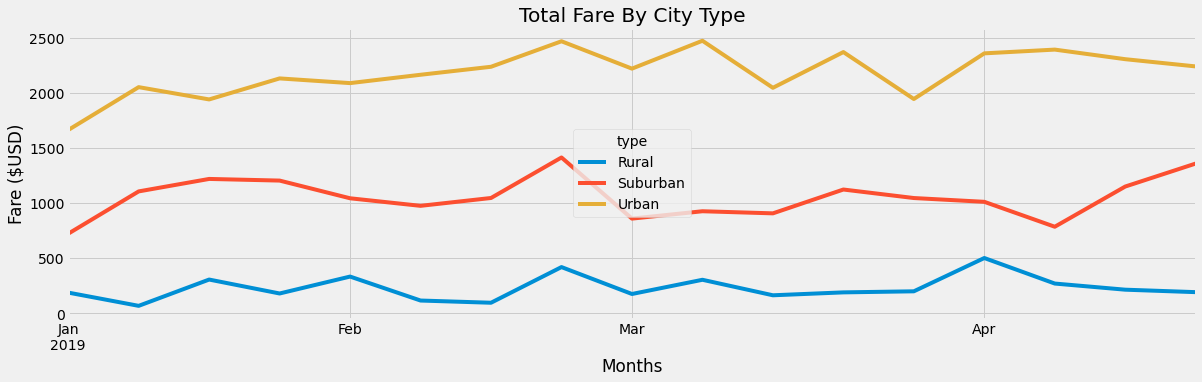

In [81]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

new_pivot_df.plot(figsize=(18,5))

plt.title("Total Fare By City Type")
plt.ylabel("Fare ($USD)")
plt.xlabel("Months")

plt.savefig('analysis/PyBer_fare_summary.png')
